In [340]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from dashboard_one import *
warnings.filterwarnings("ignore", category=FutureWarning)

In [204]:
com_col = ['Phase','RID','VISCODE']   # common columns

In [207]:
# check if one of the keyword is in a string
def key_in_str(key_list,str):
    if any(word in str for word in key_list):
        new_val = 1
    else: new_val = 0
    return new_val

# generate a new column with value: 1 if a row includes one of the keywords, 0 if not includes
def new_col_with_key(df,key_list,new_col):
    #df = pd.read_csv(file,sep=';')
    df = df.astype('string')
    df['new'] = df[df.columns].apply(lambda x: '_'.join(x.dropna()), axis=1)
    L = []
    for str in df['new']:
        L.append(key_in_str(key_list,str))
    df[new_col] = L
    return df[com_col + [new_col]]

def drop_char(df,col): # drop the row where strings in a column cant be converted to number, and convert the rest to integer
    dff = df.copy()
    col_lst = dff[col].tolist() # extract the column to be a list
    index_lst = []  # index_l to store the index which should be droped
    for i in range(len(col_lst)):  
        if pd.notna(col_lst[i]): 
            str_ = col_lst[i]
            try:
                int(str_)
            except (RuntimeError, TypeError, NameError,ValueError):
                index_lst.append(i)  
    dff = dff.drop(index_lst)
    
    lst = dff[col].to_list()
    int_lst = []
    for i in range(len(lst)):
        to_int = int(lst[i])
        int_lst.append(to_int)
    dff[col] = int_lst
    return dff.reset_index()

def char_float_na(df,col): # replace the strings in a column which cant be converted to float number, and convert the rest to float
    dff = df.copy()
    col_lst = dff[col].tolist() # extract the column to be a list
    index_lst = []  # index_l to store the index which should be droped
    for i in range(len(col_lst)):  
        if pd.notna(col_lst[i]): 
            str_ = col_lst[i]
            try:
                float(str_)
            except (RuntimeError, TypeError, NameError,ValueError):
                dff=dff.replace({str_:np.NaN})
    return dff

### 1 NPI 

#### NPI.csv 

In [4]:
npi_1 = pd.read_csv('NPI.csv').dropna(subset = ['RID'])
pd.set_option('display.max_columns', None)
npi_1.head(2)

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,NPISOURC,SPID,NPIA,NPIA1,NPIA2,NPIA3,NPIA4,NPIA5,NPIA6,NPIA7,NPIA8,NPIA9,NPIA10A,NPIA10B,NPIA10C,NPIATOT,NPIB,NPIB1,NPIB2,NPIB3,NPIB4,NPIB5,NPIB6,NPIB7,NPIB8A,NPIB8B,NPIB8C,NPIBTOT,NPIC,NPIC1,NPIC2,NPIC3,NPIC4,NPIC5,NPIC6,NPIC7,NPIC8,NPIC9A,NPIC9B,NPIC9C,NPICTOT,NPID,NPID1,NPID2,NPID3,NPID4,NPID5,NPID6,NPID7,NPID8,NPID9A,NPID9B,NPID9C,NPIDTOT,NPIE,NPIE1,NPIE2,NPIE3,NPIE4,NPIE5,NPIE6,NPIE7,NPIE8A,NPIE8B,NPIE8C,NPIETOT,NPIF,NPIF1,NPIF2,NPIF3,NPIF4,NPIF5,NPIF6,NPIF7,NPIF8A,NPIF8B,NPIF8C,NPIFTOT,NPIG,NPIG1,NPIG2,NPIG3,NPIG4,NPIG5,NPIG6,NPIG7,NPIG8,NPIG9A,NPIG9B,NPIG9C,NPIGTOT,NPIH,NPIH1,NPIH2,NPIH3,NPIH4,NPIH5,NPIH6,NPIH7,NPIH8A,NPIH8B,NPIH8C,NPIHTOT,NPII,NPII1,NPII2,NPII3,NPII4,NPII5,NPII6,NPII7,NPII8A,NPII8B,NPII8C,NPIITOT,NPIJ,NPIJ1,NPIJ2,NPIJ3,NPIJ4,NPIJ5,NPIJ6,NPIJ7,NPIJ8A,NPIJ8B,NPIJ8C,NPIJTOT,NPIK,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIL,NPIL1,NPIL2,NPIL3,NPIL4,NPIL5,NPIL6,NPIL7,NPIL8,NPIL9A,NPIL9B,NPIL9C,NPILTOT,NPITOTAL,update_stamp
0,ADNI2,2,172,38,v06,m60,03/22/2011,NaN,2011-03-14,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2012-11-16 11:18:17.0
1,ADNI2,4,160,38,v06,m60,03/24/2011,NaN,2011-03-15,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2012-11-16 11:18:17.0


select variables

In [5]:
npi_1 = pd.concat([npi_1[com_col], npi_1.filter(regex='NPIK')], axis=1)
npi_1 = drop_char(npi_1,'RID').reset_index(drop=True)  # drop the rows where RID could not be converted to integer
npi_1 = npi_1.drop_duplicates().reset_index(drop=True).sort_values(by= ['RID'])             # drop the duplicates and sort 
npi_1   #6756 rows

,Phase,RID,VISCODE,NPIK,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT
1106,ADNI2,2,v11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
173,ADNI2,2,v06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3944,ADNI2,2,v51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4285,ADNI3,2,init,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2039,ADNI2,2,v21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,ADNI3,7083,bl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6630,ADNI3,7085,bl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6641,ADNI3,7088,bl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6661,ADNI3,7092,bl,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
npi_1.groupby(['RID']).count()

,Phase,VISCODE,NPIK,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT
RID,,,,,,,,,,,,,,,
2,6,6,6,0,0,0,0,0,0,0,0,0,0,0,6
8,4,4,4,2,2,2,2,2,2,2,2,2,2,2,4
15,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
21,7,7,7,0,0,0,0,0,0,0,0,0,0,0,7
23,4,4,4,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
7085,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
7088,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
npi_1[npi_1['RID']==8]   # check some example, each patient could have more than 1 not-NA records, so should use RID-VISCODE as unique features 

,Phase,RID,VISCODE,NPIK,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT
190,ADNI2,8,v06,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0
1100,ADNI2,8,v11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2081,ADNI2,8,v21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3543,ADNI2,8,v41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0


#### NPIQ.csv

In [8]:
npi_2 = pd.read_csv('NPIQ.csv').dropna(subset = ['RID'])
pd.set_option('display.max_columns',None)
npi_2.head(2)

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,NPISOURCE,NPIA,NPIASEV,NPIB,NPIBSEV,NPIC,NPICSEV,NPID,NPIDSEV,NPIE,NPIESEV,NPIF,NPIFSEV,NPIG,NPIGSEV,NPIH,NPIHSEV,NPII,NPIISEV,NPIJ,NPIJSEV,NPIK,NPIKSEV,NPIL,NPILSEV,NPISCORE,NPDATE,update_stamp
0,ADNI1,4,2,107,bl,bl,2005-09-09,NaN,2005-09-08,1.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,NaN,2005-09-09 00:00:00.0
1,ADNI1,6,3,107,bl,bl,2005-09-13,NaN,2005-09-12,1.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,1.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,NaN,2005-09-13 00:00:00.0


In [9]:
npi_2 = pd.concat([npi_2[com_col], npi_2.filter(regex='NPIK')], axis=1)
npi_2 = drop_char(npi_2,'RID').reset_index(drop=True)  #drop the rows where RID which cant be converted to integer
npi_2 = npi_2.drop_duplicates().reset_index(drop=True).sort_values(by= ['RID'])             # drop the duplicates and sort 
npi_2   # 7010 rows

,Phase,RID,VISCODE,NPIK,NPIKSEV
0,ADNI1,2,bl,0.0,-4.0
6212,ADNI2,2,v22,0.0,NaN
5268,ADNI2,2,v12,0.0,NaN
4509,ADNI2,2,v07,0.0,NaN
3913,ADNIGO,2,m60,0.0,NaN
...,...,...,...,...,...
6964,ADNI3,6924,y1,0.0,NaN
6979,ADNI3,6940,y1,0.0,NaN
6977,ADNI3,6948,y1,0.0,NaN
6990,ADNI3,6950,y1,0.0,NaN


In [10]:
npi_merge = pd.merge(npi_1,npi_2, how = 'outer', on = com_col)   # join two dataframes
npi_merge

,Phase,RID,VISCODE,NPIK_x,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIK_y,NPIKSEV
0,ADNI2,2,v11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,ADNI2,2,v06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,ADNI2,2,v51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,ADNI3,2,init,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,ADNI2,2,v21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13742,ADNI3,6924,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
13743,ADNI3,6940,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
13744,ADNI3,6948,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
13745,ADNI3,6950,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


Missing values are marked as '-4', '-1' or NaN. 

However for NPI test, if a row contains only 0 and NaN, or in another word, if a row doesn't contain any values which are >= 1, then we should delete this row.

In [11]:
npi_merge = npi_merge.set_index(com_col)
npi_merge.head(15)

NPIK_x  NPIK1  NPIK2  NPIK3  NPIK4  NPIK5  NPIK6  NPIK7  \
Phase RID VISCODE                                                            
ADNI2 2   v11         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          v06         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          v51         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ADNI3 2   init        0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ADNI2 2   v21         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          v41         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
      8   v06         1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
          v11         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          v21         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
          v41         1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
      15  v06         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ADNI3 21  init        0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ADNI2 21  v11         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ADNI3 21  y1          0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ADNI2 21  v41         0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                   NPIK8  NPIK9A  NPIK9B  NPIK9C  NPIKTOT  NPIK_y  NPIKSEV  
Phase RID VISCODE                                                           
ADNI2 2   v11        NaN     NaN     NaN     NaN      0.0     NaN      NaN  
          v06        NaN     NaN     NaN     NaN      0.0     NaN      NaN  
          v51        NaN     NaN     NaN     NaN      0.0     NaN      NaN  
ADNI3 2   init       NaN     NaN     NaN     NaN      0.0     NaN      NaN  
ADNI2 2   v21        NaN     NaN     NaN     NaN      0.0     NaN      NaN  
          v41        NaN     NaN     NaN     NaN      0.0     NaN      NaN  
      8   v06        0.0     3.0     2.0     0.0      6.0     NaN      NaN  
          v11        NaN     NaN     NaN     NaN      0.0     NaN      NaN  
          v21        NaN     NaN     NaN     NaN      0.0     NaN      NaN  
          v41        0.0     4.0     2.0     1.0      8.0     NaN      NaN  
      15  v06        NaN     NaN     NaN     NaN      0.0     NaN      NaN  
ADNI3 21  init       NaN     NaN     NaN     NaN      0.0     NaN      NaN  
ADNI2 21  v11        NaN     NaN     NaN     NaN      0.0     NaN      NaN  
ADNI3 21  y1         NaN     NaN     NaN     NaN      0.0     NaN      NaN  
ADNI2 21  v41        NaN     NaN     NaN     NaN      0.0     NaN      NaN

In [12]:
npi_boolean = (npi_merge >= 1)    # convert npi to boolean data, where True means value >=1, else False.
#npi_boolean

In [13]:
npi_new = pd.DataFrame(npi_boolean.any(axis='columns')) # if a row has any True, will be labeled as True. Else (if all False)--> False.
npi_new.columns = ['whole_row']  # rename column
npi_new = npi_new.reset_index()  # flatten the dataframe
npi_new = npi_new[npi_new['whole_row'] == True]  # keep the rows which is true
npi_new

,Phase,RID,VISCODE,whole_row
6,ADNI2,8,v06,True
9,ADNI2,8,v41,True
25,ADNI2,31,v11,True
26,ADNI2,31,v21,True
28,ADNI2,31,v06,True
...,...,...,...,...
13654,ADNI3,6449,y1,True
13688,ADNI3,6516,y3,True
13722,ADNI3,6654,y1,True
13734,ADNI3,6820,y2,True


In [14]:
npi_short = pd.merge(npi_new, npi_merge, on=com_col).drop(['whole_row'],axis=1)
npi_short

,Phase,RID,VISCODE,NPIK_x,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIK_y,NPIKSEV
0,ADNI2,8,v06,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,NaN,NaN
1,ADNI2,8,v41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,NaN,NaN
2,ADNI2,31,v11,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN,NaN
3,ADNI2,31,v21,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,NaN,NaN
4,ADNI2,31,v06,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,ADNI3,6449,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2661,ADNI3,6516,y3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2662,ADNI3,6654,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2663,ADNI3,6820,y2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


check if the column NPIK_x and NPIK_y could be merged as one column 'NPIK'

In [15]:
npi_short['NPIK'] = 100
for i in range(len(npi_short)):
    if np.isnan(npi_short['NPIK_x'][i])==False and np.isnan(npi_short['NPIK_y'][i])==True:
        npi_short['NPIK'][i] = npi_short['NPIK_x'][i]
    elif np.isnan(npi_short['NPIK_x'][i])==True and np.isnan(npi_short['NPIK_y'][i])==False:
        npi_short['NPIK'][i] = npi_short['NPIK_y'][i]
    elif np.isnan(npi_short['NPIK_x'][i])==True and np.isnan(npi_short['NPIK_y'][i])==True:
        npi_short['NPIK'][i] = np.nan
    elif np.isnan(npi_short['NPIK_x'][i])==False and np.isnan(npi_short['NPIK_y'][i])==False:
        if npi_short['NPIK_x'][i] == npi_short['NPIK_y'][i]:
            npi_short['NPIK'][i] = npi_short['NPIK_x'][i]
        else: npi_short['NPIK'][i] = 5
npi_short.groupby(['NPIK']).count()  

<ipython-input-15-0465483e52ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npi_short['NPIK'][i] = npi_short['NPIK_x'][i]
<ipython-input-15-0465483e52ab>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: npi_short['NPIK'][i] = 5
<ipython-input-15-0465483e52ab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npi_short['NPIK'][i] = npi_short['NPIK_x'][i]
<ipython-input-15-0465483e52ab>:6: SettingWithCopyWarning: 
A value is 

,Phase,RID,VISCODE,NPIK_x,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIK_y,NPIKSEV
NPIK,,,,,,,,,,,,,,,,,,
1,2603,2603,2603,1328,1325,1324,1322,1321,1322,1324,1324,1317,1325,1326,1325,1324,1276,1276
2,61,61,61,0,0,0,0,0,0,0,0,0,0,0,0,0,61,48
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


NPIK has the value of 1, 2(NA), 5(conflict).

I will replace the NPIK value of 2 and 5 as Nan.Afterwards, NPIK is 1 for all samples, the 0 never appeared. In this case, this variable will not help us for further analysis. So I will drop the column 'NPIK'.

except NPIKSEV, NPIKTOT, NPIK9A 9B 9C, all other NPIK columns should only have value 0 or 1 or Nan.

In [16]:
npi_short = npi_short.drop(['NPIK_x','NPIK_y','NPIK'],axis=1)
npi_short = npi_short.replace({-4:np.nan,-1:np.nan})  # replace all -4 and -1 as nan
for value in npi_short.iloc[:,3:11]:   # replace the values in some columns as nan 
    if value!=0 and value!=1:
        value = np.nan
npi_short.to_csv('npi_short.csv')

### Files for medical history 
there are three files under assessment diagnosis: ADSXLIST,BLCHANGE,MODHACH. 

four files under medical history: MEDHIST;INITHEALTH;RECMHIST;RECBLLOG

We use these files to find out medical history of hypertension,OSA,anxiety,depression,insomnia

It is not sure if they are same. Therefore all three will be checked.

In [211]:
adsxlist = pd.read_csv('ADSXLIST.csv',sep=';').dropna(subset = ['RID'])  # drop the rows where RID is not available
blchange = pd.read_csv('BLCHANGE.csv',sep = ';').dropna(subset = ['RID'])
modhach = pd.read_csv('MODHACH.csv',sep = ';').dropna(subset = ['RID'])
ass_diag_merge = pd.concat([adsxlist,blchange,modhach]).reset_index(drop=True)
ass_diag_merge = drop_char(ass_diag_merge,'RID').reset_index(drop=True).drop(['index'],axis=1)  #drop the rows where RID cant be converted to integer
ass_diag_merge

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,AXNAUSEA,AXVOMIT,AXDIARRH,AXCONSTP,AXABDOMN,AXSWEATN,AXDIZZY,AXENERGY,AXDROWSY,AXVISION,AXHDACHE,AXDRYMTH,AXBREATH,AXCOUGH,AXPALPIT,AXCHEST,AXURNDIS,AXURNFRQ,AXANKLE,AXMUSCLE,AXRASH,AXINSOMN,AXDPMOOD,AXCRYING,AXELMOOD,AXWANDER,AXFALL,AXOTHER,AXSPECIF,update_stamp,BCPREDX,BCADAS,BCMMSE,BCMMSREC,BCNMMMS,BCNEUPSY,BCNONMEM,BCFAQ,BCCDR,BCDEPRES,BCSTROKE,BCDELIR,BCEXTCIR,BCEXTSP,BCCORADL,BCCORCOG,BCSUMM,HMONSET,HMSTEPWS,HMSOMATC,HMEMOTIO,HMHYPERT,HMSTROKE,HMNEURSM,HMNEURSG,HMSCORE,DATE,SOURCE
0,ADNI1,2,2,107,m06,m06,07.03.2006,NaN,06.03.2006,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-4,07.03.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADNI1,4,5,107,m06,m06,09.03.2006,NaN,09.03.2006,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,fever,09.03.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADNI1,6,3,107,m06,m06,13.03.2006,NaN,13.03.2006,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,-4,13.03.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADNI1,8,8,107,m06,m06,21.03.2006,NaN,20.03.2006,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,-4,21.03.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADNI1,10,7,10,m06,m06,13.04.2006,NaN,13.04.2006,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,-4,13.04.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21647,ADNI3,163991,7105,25,sc,sc,23.08.2022,23.08.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.08.2022 15:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,22.08.2022,1.0
21648,ADNI3,164375,7097,10,sc,sc,26.08.2022,26.08.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.08.2022 04:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.07.2022,1.0
21649,ADNI3,165144,7103,10,sc,sc,07.09.2022,07.09.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08.09.2022 04:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.08.2022,1.0
21650,ADNI3,165293,7106,59,sc,sc,09.09.2022,09.09.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.09.2022 04:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,08.09.2022,1.0


In [213]:
medhist = pd.read_csv('MEDHIST.csv',sep=';').dropna(subset = ['RID'])
inithealth = pd.read_csv('INITHEALTH.csv',sep = ';').dropna(subset = ['RID'])
recmhist = pd.read_csv('RECMHIST.csv',sep = ';').dropna(subset = ['RID'])
recbllog = pd.read_csv('RECBLLOG.csv',sep = ';').dropna(subset = ['RID'])
med_hist_merge = pd.concat([medhist,inithealth,recmhist,recbllog]).reset_index(drop=True) # connect all rows and reset index
med_hist_merge = drop_char(med_hist_merge,'RID').reset_index(drop=True).drop(['index'],axis=1)  #drop the RID which cant be converted to integer
med_hist_merge

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,MHSOURCE,MHPSYCH,MH2NEURL,MH3HEAD,MH4CARD,MH5RESP,MH6HEPAT,MH7DERM,MH8MUSCL,MH9ENDO,MH10GAST,MH11HEMA,MH12RENA,MH13ALLE,MH14ALCH,MH14AALCH,MH14BALCH,MH14CALCH,MH15DRUG,MH15ADRUG,MH15BDRUG,MH16SMOK,MH16ASMOK,MH16BSMOK,MH16CSMOK,MH17MALI,MH18SURG,MH19OTHR,MHCOMMEN,update_stamp,IHNUM,IHSYMPTOM,IHDESC,IHSURG,IHSURGDATE,IHPRESENT,IHCHRON,IHSEVER,IHDTONSET,IHONGOING,IHCEASE,IHCOMM,RECNO,MHNUM,MHDESC,MHDTONSET,MHCUR,MHSTAB,BSXSYMNO,BSXSYMP,BSXSEVER,BSXCHRON,BSXONSET,BSXCONTD,BSXCEASE
0,ADNI1,8.0,2,107.0,sc,sc,17.08.2005,NaN,17.08.2005,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,-4,17.08.2005 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADNI1,10.0,1,10.0,f,f,18.08.2005,NaN,18.08.2005,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.0,-4,18.08.2005 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADNI1,12.0,3,107.0,sc,sc,18.08.2005,NaN,18.08.2005,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0.0,-4,18.08.2005 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADNI1,14.0,4,10.0,sc,sc,18.08.2005,NaN,18.08.2005,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.0,1.0,0.0,-4,18.08.2005 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADNI1,16.0,5,107.0,sc,sc,23.08.2005,NaN,23.08.2005,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.0,1.0,0.0,-4,23.08.2005 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62562,ADNI2,11012.0,2200,41.0,v06,m12,19.05.2015,19.05.2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.05.2015 19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,22.0,sleep apnea,1.0,2.0,--/--/2006,1.0,-4
62563,ADNI2,11016.0,4868,13.0,v01,sc,18.08.2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.08.2015 19:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,28.0,post nasal drip,1.0,3.0,--/--/2005,1.0,-4
62564,ADNI2,11018.0,5195,9.0,v01,sc,20.08.2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.08.2015 19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,8.0,Low energy,1.0,2.0,--/--/2010,1.0,-4
62565,ADNI2,11020.0,5195,9.0,v01,sc,20.08.2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.08.2015 19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,19.0,Ankle swelling,1.0,2.0,--/--/2008,1.0,-4


In [214]:
key_osa = ['apnea','sleep disordered breathing','SDB','OSA']   
key_hypertension = ['hypertension','Hypertension','HTN','htn'] 

### 2. hypertension
It is important to know that, we have to use the right data to search for keywords.

i.e. we should only use the file which involve the information about 'hypertension' to evaluate if the patients in this file has hypertension or not.

If we use a file which not involve the information about 'hypertension' to evaluate hypertension patients, then all the patients in this file will be labeled as 'not-have-hypertension', which is not true, their hypertension info are not available, should be labeled as 'NA'. 

In [21]:
htn_1 = new_col_with_key(ass_diag_merge,key_hypertension,'hypertension')    # extract key words from assessment diagnosis files
htn_2 = new_col_with_key(med_hist_merge,key_hypertension,'hypertension')   # extract key words from medical history files
htn_3 = modhach[com_col + ['HMHYPERT']]                     # from column'HMHYPERT'
htn_3 = htn_3.rename(columns={'HMHYPERT':'hypertension'})
htn = pd.concat([htn_1,htn_2,htn_3])           # bind all the rows
htn = drop_char(htn,'RID').reset_index(drop=True)   #drop the RID which could not be converted to integer
htn = htn.drop_duplicates().reset_index(drop=True).sort_values(by= ['RID'])             # drop the duplicates
htn.head(3)

,Phase,RID,VISCODE,hypertension
16264,ADNI1,1,f,0.0
0,ADNI1,2,m06,0.0
9325,ADNI2,2,v21,0.0


In [22]:
htn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18549 entries, 16264 to 16952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Phase         18549 non-null  object 
 1   RID           18549 non-null  int64  
 2   VISCODE       18549 non-null  object 
 3   hypertension  18537 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 724.6+ KB


check if there are hypertension positive samples in each file, to make sure that we are using the right files:

all three files have positive and negative samples. So we are using the right files.

In [23]:
htn_1[htn_1['hypertension']==1].head(2)   

,Phase,RID,VISCODE,hypertension
942,ADNI1,72,m18,1
1348,ADNI1,1195,m06,1


In [24]:
htn_2[htn_2['hypertension']==1].head(2)

,Phase,RID,VISCODE,hypertension
194,ADNI1,261,f,1
1053,ADNI1,1298,f,1


In [25]:
htn_3[htn_3['hypertension']==1].head(2)

,Phase,RID,VISCODE,hypertension
1,ADNI1,3,sc,1.0
2,ADNI1,4,sc,1.0


#### Question: should each patient have only one hypertension label?

In [26]:
vis_dict = pd.read_csv("VISITS_DICT.csv",sep = ';')       #VISCODE DICTIONARY
vis_dict.head(11)

,Phase,ID,VISCODE,VISNAME,VISORDER
0,ADNI1,1,sc,Screening,1.0
1,ADNI1,2,bl,Baseline,2.0
2,ADNI1,3,m06,Month 6,3.0
3,ADNI1,4,m12,Month 12,4.0
4,ADNI1,5,m18,Month 18,5.0
5,ADNI1,6,m24,Month 24,6.0
6,ADNI1,7,m30,Month 30,7.0
7,ADNI1,8,m36,Month 36,8.0
8,ADNI1,9,m42,Month 42,9.0
9,ADNI1,10,m48,Month 48,10.0


#### RID=3 is marked as hypertension positive at the first time (VISCODE = sc), in the later visits, as negative. RID=4 is labeled as positive at first and second visits (VISCODE=sc,bl). It is very much unlikely that, after 6 months, his/her hypertension is cured.  Hypertension is considered as can be controlled with medication, but it can not be cured. So hypertension data is unique to RID, not change by ' Phase' 'VISCODE' or other features. 

In [27]:
htn[htn['RID']==3]   

,Phase,RID,VISCODE,hypertension
103,ADNI1,3,m12,0.0
14710,ADNI1,3,sc,0.0
16953,ADNI1,3,sc,1.0
4910,ADNI1,3,bl,0.0
481,ADNI1,3,m18,0.0
2,ADNI1,3,m06,0.0
1163,ADNI1,3,m24,0.0


In [28]:
htn_short = htn.groupby(['RID']).sum().reset_index()
htn_short.loc[(htn_short.hypertension >= 1), 'hypertension'] = 1
htn_short.loc[(htn_short.hypertension == 0), 'hypertension'] = 0
htn_short.to_csv('htn_short.csv')
htn_short.head(3)

,RID,hypertension
0,1,0.0
1,2,0.0
2,3,1.0


### OSA
Till now,  sleep apnea can not be cured completely

In [29]:
ass_diag_merge

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,AXNAUSEA,AXVOMIT,AXDIARRH,AXCONSTP,AXABDOMN,AXSWEATN,AXDIZZY,AXENERGY,AXDROWSY,AXVISION,AXHDACHE,AXDRYMTH,AXBREATH,AXCOUGH,AXPALPIT,AXCHEST,AXURNDIS,AXURNFRQ,AXANKLE,AXMUSCLE,AXRASH,AXINSOMN,AXDPMOOD,AXCRYING,AXELMOOD,AXWANDER,AXFALL,AXOTHER,AXSPECIF,update_stamp,BCPREDX,BCADAS,BCMMSE,BCMMSREC,BCNMMMS,BCNEUPSY,BCNONMEM,BCFAQ,BCCDR,BCDEPRES,BCSTROKE,BCDELIR,BCEXTCIR,BCEXTSP,BCCORADL,BCCORCOG,BCSUMM,HMONSET,HMSTEPWS,HMSOMATC,HMEMOTIO,HMHYPERT,HMSTROKE,HMNEURSM,HMNEURSG,HMSCORE,DATE,SOURCE
0,ADNI1,2,2,107,m06,m06,07.03.2006,NaN,06.03.2006,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-4,07.03.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADNI1,4,5,107,m06,m06,09.03.2006,NaN,09.03.2006,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,fever,09.03.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADNI1,6,3,107,m06,m06,13.03.2006,NaN,13.03.2006,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,-4,13.03.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADNI1,8,8,107,m06,m06,21.03.2006,NaN,20.03.2006,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,-4,21.03.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADNI1,10,7,10,m06,m06,13.04.2006,NaN,13.04.2006,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,-4,13.04.2006 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21647,ADNI3,163991,7105,25,sc,sc,23.08.2022,23.08.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.08.2022 15:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,22.08.2022,1.0
21648,ADNI3,164375,7097,10,sc,sc,26.08.2022,26.08.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.08.2022 04:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.07.2022,1.0
21649,ADNI3,165144,7103,10,sc,sc,07.09.2022,07.09.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08.09.2022 04:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.08.2022,1.0
21650,ADNI3,165293,7106,59,sc,sc,09.09.2022,09.09.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.09.2022 04:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,08.09.2022,1.0


In [30]:
osa_1 = new_col_with_key(ass_diag_merge,key_osa,'OSA')    # extract key words from assessment diagnosis files
osa_2 = new_col_with_key(med_hist_merge,key_osa,'OSA')   # extract key words from medical history files
osa_merge = pd.concat([osa_1,osa_2])           # bind all the rows
osa_merge = drop_char(osa_merge,'RID').reset_index(drop=True)   #drop the RID which could not be converted to integer
osa_merge = osa_merge.drop_duplicates().reset_index(drop=True).sort_values(by= ['RID'])             # drop the duplicates
osa_merge.head(3)

,Phase,RID,VISCODE,OSA
16177,ADNI1,1,f,0
0,ADNI1,2,m06,0
10818,ADNI2,2,v41,0


In [31]:
osa_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16674 entries, 16177 to 14672
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Phase    16674 non-null  string
 1   RID      16674 non-null  int64 
 2   VISCODE  16674 non-null  string
 3   OSA      16674 non-null  int64 
dtypes: int64(2), string(2)
memory usage: 651.3 KB


In [32]:
osa_1[osa_1['OSA']==1].head(2)   # both osa_1 and osa_2 contain positive OSA -> the files we used are OSA-relevant

,Phase,RID,VISCODE,OSA
77,ADNI1,205,m06,1
635,ADNI1,400,m12,1


In [33]:
osa_2[osa_2['OSA']==1].head(2)

,Phase,RID,VISCODE,OSA
2547,ADNI2,1346,v06,1
2868,ADNI2,919,v06,1


#### Question: should each patient have only one OSA label? 

check some patients

i.e.RID=999: 17 records/visit, but only one positive record (v06,some middle time point of the whole study),since sleep spnea is not curable, especially not in that short time.

RID=205: 17 records/visit, but only one positive record (m06, again some middle time point of the whole study)

So, each patient should have only one OSA label.

In [34]:
osa_merge[osa_merge['RID']==205]   

,Phase,RID,VISCODE,OSA
3573,ADNI1,205,m36,0
438,ADNI1,205,m12,0
4987,ADNI1,205,bl,0
14846,ADNI1,205,sc,0
8251,ADNI2,205,v11,0
2892,ADNI1,205,m30,0
12320,ADNI3,205,init,0
6448,ADNI2,205,v06,0
1240,ADNI1,205,m18,0
5252,ADNI1,205,m06,0


In [35]:
osa_short = osa_merge.groupby(['RID']).sum().reset_index()
osa_short.loc[(osa_short['OSA'] >= 1), 'OSA'] = 1
osa_short.loc[(osa_short['OSA'] == 0), 'OSA'] = 0
osa_short.to_csv('osa_short.csv')
osa_short.head(3)

,RID,OSA
0,1,0
1,2,0
2,3,0


### Insomnia
Insomnia can be fully cured. 75% of individuals with acute insomnia were able to make a full recovery after about 12 months.

In [279]:
ass_diag_merge2 = pd.concat([blchange,modhach]).reset_index(drop=True) # ass_diag_merge without adsxlist
insomnia_1 = new_col_with_key(ass_diag_merge2,'insomnia','insomnia')   # extract key words from assessment diagnosis 2 files, because the ADSXLIST also has the insomnia col
insomnia_2 = new_col_with_key(med_hist_merge,'insomnia','insomnia')   # extract key words from medical history files
insomnia_3 = adsxlist[com_col]  
insomnia_3['insomnia']= adsxlist['AXINSOMN'] - 1 #take the column 'AXINSOMN' and convert 1->0, 2->1
insomnia_bl = pd.read_csv('BLSCHECK.csv',sep=';')[com_col + ['BCINSOMN']]
insomnia_bl['insomnia'] = insomnia_bl['BCINSOMN'] - 1 
insomnia_bl = insomnia_bl.drop(['BCINSOMN'],axis=1)
insomnia_merge = pd.concat([insomnia_1,insomnia_2,insomnia_3,insomnia_bl])           # bind all the rows
insomnia_merge = drop_char(insomnia_merge,'RID').reset_index(drop=True)   #drop the RID which could not be converted to integer
insomnia_merge = insomnia_merge.drop_duplicates().reset_index(drop=True).sort_values(by= ['RID'])             # drop the duplicates
def rename_value(value):
    if value not in [0,1]:
        return np.nan
    else:
        return value
insomnia_merge['insomnia'] = insomnia_merge['insomnia'].apply(rename_value)#.drop(['index'],axis=1)   # replace the values that are not 1 or 0 to Nan
insomnia_merge = insomnia_merge.drop(['index'],axis=1).drop_duplicates().reset_index(drop=True)
insomnia_merge

<ipython-input-279-da68bd8d62eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insomnia_3['insomnia']= adsxlist['AXINSOMN'] - 1 #take the column 'AXINSOMN' and convert 1->0, 2->1


,Phase,RID,VISCODE,insomnia
0,ADNI1,1,f,0.0
1,ADNI1,1,f,1.0
2,ADNI2,2,v41,1.0
3,ADNIGO,2,m60,1.0
4,ADNI1,2,bl,0.0
...,...,...,...,...
22694,ADNI3,7102,sc,1.0
22695,ADNI3,7103,sc,1.0
22696,ADNI3,7104,sc,1.0
22697,ADNI3,7105,sc,1.0


#### check some samples.
RID=108: all records are insomnia positive.
RID=3: all records are insomnia positive (bl showed up two times, once = 0, once 1).Many samples have similiar situation.

So, the strategie is, for the records with same RID and VISCODE, we should use the sum of the records, if sum>= 1,insomnia should be set as 1.

for the insomnia data, we need both RID and VISCODE features to link to other data.

In [283]:
insomnia_short = insomnia_merge.groupby(['RID','VISCODE','Phase']).sum().reset_index()  # groupby the rows with same 'RID and VISCODE', and sum
insomnia_short.loc[(insomnia_short['insomnia'] >= 1), 'insomnia'] = 1 
insomnia_short

,RID,VISCODE,Phase,insomnia
0,1,f,ADNI1,1.0
1,2,bl,ADNI1,1.0
2,2,init,ADNI3,1.0
3,2,m06,ADNI1,1.0
4,2,m36,ADNI1,1.0
...,...,...,...,...
16329,7102,sc,ADNI3,1.0
16330,7103,sc,ADNI3,1.0
16331,7104,sc,ADNI3,1.0
16332,7105,sc,ADNI3,1.0


In [284]:
insomnia_short.groupby('insomnia').count()

,RID,VISCODE,Phase
insomnia,,,
0.0,886,886,886
1.0,15448,15448,15448


In [285]:
insomnia_short.to_csv('insomnia_short.csv')
insomnia_short.head(3)

,RID,VISCODE,Phase,insomnia
0,1,f,ADNI1,1.0
1,2,bl,ADNI1,1.0
2,2,init,ADNI3,1.0


### Anxiety
There's no way to completely cure any anxiety disorder

In [46]:
anxiety_1 = new_col_with_key(ass_diag_merge,'anxi','anxiety')    # extract key words from assessment diagnosis files
#anxiety_1.loc[(ass_diag_merge.AXDPMOOD == 2), 'depression'] = 1
anxiety_2 = new_col_with_key(med_hist_merge,'anxi','anxiety')   # extract key words from medical history files
anxiety_merge = pd.concat([anxiety_1,anxiety_2])           # bind all the rows
anxiety_merge = drop_char(anxiety_merge,'RID').reset_index(drop=True)   #drop the RID which could not be converted to integer
anxiety_merge = anxiety_merge.drop_duplicates().reset_index(drop=True).sort_values(by= ['RID'])             # drop the duplicates
anxiety_merge.head(3)

,Phase,RID,VISCODE,anxiety
20154,ADNI1,1,f,1
19518,ADNI1,1,f,0
0,ADNI1,2,m06,0


In [47]:
anxiety_1[anxiety_1['anxiety']==1].head(2) # both files have positive depression samples--> it is right to take these files for anxiety labels

,Phase,RID,VISCODE,anxiety
8,ADNI1,15,m06,1
10,ADNI1,21,m06,1


In [48]:
anxiety_2[anxiety_2['anxiety']==1].head(2)

,Phase,RID,VISCODE,anxiety
17,ADNI1,25,f,1
25,ADNI1,30,sc,1


#### check some samples.
RID=2, with VISCODE we could see that this patient has discontinuous anxiety positive, which is impossible to be true. So the 0 is just the time, his/her anxiety disorder is not recorded. 
RID=4, similiar to RID=2. 

Each patient should have only one label for anxiety disorder.

In [49]:
anxiety_merge[anxiety_merge['RID']==3]   

,Phase,RID,VISCODE,anxiety
481,ADNI1,3,m18,0
1163,ADNI1,3,m24,0
4910,ADNI1,3,bl,0
20155,ADNI1,3,sc,1
16289,ADNI1,3,sc,0
2,ADNI1,3,m06,0
103,ADNI1,3,m12,0
21770,ADNI1,3,bl,1


In [50]:
anxiety_short = anxiety_merge.groupby(['RID']).sum().reset_index()
anxiety_short.loc[(anxiety_short['anxiety'] >= 1), 'anxiety'] = 1
anxiety_short.loc[(anxiety_short['anxiety'] == 0), 'anxiety'] = 0
anxiety_short.to_csv('anxiety_short.csv')
anxiety_short.head(3)

,RID,anxiety
0,1,1
1,2,1
2,3,1


In [51]:
anxiety_merge.groupby('anxiety').count()

,Phase,RID,VISCODE
anxiety,,,
0,10891,10891,10891
1,11845,11845,11845


### depression
There's no cure for depression, but you still have plenty of options for treatment, all of which can improve your symptoms and minimize their impact on your daily life.

In [52]:
dxsum = pd.read_csv('DXSUM_PDXCONV_ADNIALL.csv',sep=';')
depression_1 = new_col_with_key(ass_diag_merge,'depr','depression')    # extract key words from assessment diagnosis files
depression_1.loc[(ass_diag_merge.AXDPMOOD == 2), 'depression'] = 1
depression_2 = new_col_with_key(med_hist_merge,'depr','depression')   # extract key words from medical history files
depression_3 = dxsum[com_col + ['DXAPROB','DXAPOSS']]                     # from column'HMHYPERT'
depression_3.loc[(depression_3['DXAPOSS'] == '1')|(depression_3['DXAPROB'] == '1'), 'depression'] = 1
depression_3 = depression_3[com_col + ['depression']]
#htn_3 = htn_3.rename(columns={'HMHYPERT':'hypertension'})

depression_merge = pd.concat([depression_1,depression_2,depression_3])           # bind all the rows
depression_merge = drop_char(depression_merge,'RID').reset_index(drop=True)   #drop the RID which could not be converted to integer
depression_merge = depression_merge.drop_duplicates().reset_index(drop=True).sort_values(by= ['RID'])             # drop the duplicates
depression_merge.head(3)

C:\Users\weipi\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\weipi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Phase,RID,VISCODE,depression
19527,ADNI1,1,f,0.0
20417,ADNI1,1,f,1.0
26409,ADNIGO,2,m60,NaN


In [53]:
depression_1[depression_1['depression']==1].head(2)  # both files have positive depression samples--> it is right to take these files for depression labels

,Phase,RID,VISCODE,depression
1,ADNI1,5,m06,1
4,ADNI1,7,m06,1


In [54]:
depression_2[depression_2['depression']==1].head(2)

,Phase,RID,VISCODE,depression
17,ADNI1,25,f,1
25,ADNI1,30,sc,1


In [55]:
depression_3[depression_3['depression']==1].head(2)

,Phase,RID,VISCODE,depression
2,ADNI1,3,bl,1.0
3,ADNI1,3,m06,1.0


#### check some examples, the feature 'depression' is again similiar to 'depression' and 'OSA', that each patient should have only one label.

In [56]:
depression_merge[depression_merge['RID']==2]

,Phase,RID,VISCODE,depression
26409,ADNIGO,2,m60,NaN
31945,ADNI2,2,v41,NaN
9429,ADNI2,2,v11,1.0
23215,ADNI1,2,bl,NaN
23216,ADNI1,2,m06,NaN
32794,ADNI3,2,init,NaN
0,ADNI1,2,m06,0.0
10913,ADNI2,2,v21,1.0
27202,ADNI2,2,v06,NaN
16297,ADNI1,2,sc,0.0


In [57]:
depression_short = depression_merge.groupby(['RID']).sum().reset_index()
depression_short.loc[(depression_short['depression'] >= 1), 'depression'] = 1
depression_short.loc[(depression_short['depression'] == 0), 'depression'] = 0
depression_short = depression_short.dropna()
depression_short.to_csv('depression_short.csv')
depression_short

,RID,depression
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
3579,7102,1.0
3580,7103,1.0
3581,7104,1.0
3582,7105,1.0


In [58]:
depression_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 0 to 3583
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RID         3584 non-null   int64  
 1   depression  3584 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 84.0 KB


### GDSCALE

In [59]:
gdscale = pd.read_csv('GDSCALE.csv')
gdscale.head(2)

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,GDSOURCE,GDUNABL,GDUNABSP,GDSATIS,GDDROP,GDEMPTY,GDBORED,GDSPIRIT,GDAFRAID,GDHAPPY,GDHELP,GDHOME,GDMEMORY,GDALIVE,GDWORTH,GDENERGY,GDHOPE,GDBETTER,GDTOTAL,update_stamp
0,ADNI1,6,2,107,sc,sc,2005-08-17,NaN,2005-08-17,1.0,-4.0,-4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2005-08-17 00:00:00.0
1,ADNI1,8,3,107,sc,sc,2005-08-18,NaN,2005-08-18,1.0,-4.0,-4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2005-08-18 00:00:00.0


In [60]:
col_to_drop = ['ID','SITEID','VISCODE2','USERDATE','USERDATE2', 'EXAMDATE','GDSOURCE','GDUNABL','GDUNABSP','update_stamp']
gdscale_short = gdscale.drop(col_to_drop,axis=1).drop_duplicates().reset_index(drop=True).sort_values(by= ['RID']) 
gdscale_short['GDCAT'] = gdscale_short['GDTOTAL'].apply(lambda x: 3 if x > 9 else 2 if x > 4 else 1 if x > 0 else -4)
gdscale_short = drop_char(gdscale_short,'RID').reset_index(drop=True)  #drop the row where RID cant be converted to integer
gdscale_supershort = gdscale_short[com_col + ['GDTOTAL','GDCAT']]
gdscale_short.to_csv('gdscale_short.csv')
gdscale_supershort.to_csv('gdscale_supershort.csv')
gdscale_short
gdscale_supershort

,Phase,RID,VISCODE,GDTOTAL,GDCAT
0,ADNI1,2,sc,1.0,1
1,ADNI2,2,v41,1.0,1
2,ADNI2,2,v31,2.0,1
3,ADNI2,2,v51,3.0,1
4,ADNI1,2,m36,2.0,1
...,...,...,...,...,...
11367,ADNI3,6978,sc,0.0,-4
11368,ADNI3,6979,sc,NaN,-4
11369,ADNI3,6980,sc,1.0,1
11370,ADNI3,6981,sc,0.0,-4


### NEUROBAT

Neuropsychological Battery[ADNI1,GO,2]: Neurobattery scores (i.e. LIMMTOTAL (immediate recall total score), AVTOT1-AVTOT5 (Rey Auditory Verbal Learning Test scores)) (NEUROBAT.csv)

In [61]:
neurobat = pd.read_csv('NEUROBAT.csv',sep=';')
neurobat.head(2)

C:\Users\weipi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,CLOCKCIRC,CLOCKSYM,CLOCKNUM,CLOCKHAND,CLOCKTIME,CLOCKSCOR,COPYCIRC,COPYSYM,COPYNUM,COPYHAND,COPYTIME,COPYSCOR,LMSTORY,LIMMTOTAL,LIMMEND,AVTOT1,AVERR1,AVTOT2,AVERR2,AVTOT3,AVERR3,AVTOT4,AVERR4,AVTOT5,AVERR5,AVTOT6,AVERR6,AVTOTB,AVERRB,AVENDED,DSPANFOR,DSPANFLTH,DSPANBAC,DSPANBLTH,CATANIMSC,CATANPERS,CATANINTR,CATVEGESC,CATVGPERS,CATVGINTR,TRAASCOR,TRAAERRCOM,TRAAERROM,TRABSCOR,TRABERRCOM,TRABERROM,DIGITSCOR,LDELBEGIN,LDELTOTAL,LDELCUE,BNTND,BNTSPONT,BNTSTIM,BNTCSTIM,BNTPHON,BNTCPHON,BNTTOTAL,AVDELBEGAN,AVDEL30MIN,AVDELERR1,AVDELTOT,AVDELERR2,ANARTND,ANARTERR,MINTSEMCUE,MINTTOTAL,MINTUNCUED,RAVLT_forgetting,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,DATE,SOURCE,update_stamp
0,ADNI1,12,2,107,sc,sc,17.08.2005,NaN,17.08.2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.08.2014 16:22
1,ADNI1,14,3,107,sc,sc,18.08.2005,NaN,18.08.2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.08.2014 16:22


In [62]:
col_to_drop = ['ID','SITEID','VISCODE2','USERDATE','USERDATE2', 'EXAMDATE','update_stamp']
neurobat_short = neurobat.drop(col_to_drop,axis=1).drop_duplicates().reset_index(drop=True).sort_values(by= ['RID']) 
neurobat_short = drop_char(neurobat_short,'RID').reset_index(drop=True)  #drop the row where RID cant be converted to integer
neurobat_supershort = neurobat_short[com_col + ['LIMMTOTAL','AVTOT1','AVTOT2','AVTOT3','AVTOT4','AVTOT5']]
neurobat_short.to_csv('neurobat_short.csv')
neurobat_supershort.to_csv('neurobat_supershort.csv')
neurobat_short
neurobat_supershort

,Phase,RID,VISCODE,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5
0,ADNI1,1,f,12.0,NaN,NaN,NaN,NaN,NaN
1,ADNI1,2,sc,13.0,NaN,NaN,NaN,NaN,NaN
2,ADNI2,2,v11,13.0,5.0,5.0,8.0,9.0,10.0
3,ADNI2,2,v41,11.0,5.0,5.0,6.0,8.0,10.0
4,ADNI2,2,v51,14.0,7.0,6.0,6.0,8.0,10.0
...,...,...,...,...,...,...,...,...,...
15331,ADNI3,7102,sc,15.0,NaN,NaN,NaN,NaN,NaN
15332,ADNI3,7103,sc,18.0,NaN,NaN,NaN,NaN,NaN
15333,ADNI3,7104,sc,14.0,NaN,NaN,NaN,NaN,NaN
15334,ADNI3,7105,sc,1.0,NaN,NaN,NaN,NaN,NaN


### ADNIMERGE  
#### there are many interesting features, i.e. the brain volume? 
ecog: everyday cognitive

In [63]:
adnimerge = pd.read_csv('ADNIMERGE.csv',sep=',')
adnimerge.head(2)

C:\Users\weipi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,20,21,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,FBB,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,FSVERSION,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,mPACCdigit,mPACCtrailsB,EXAMDATE_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,FAQ_bl,mPACCdigit_bl,mPACCtrailsB_bl,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.25173,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN,-4.3167,-4.11991,2005-09-08,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,-4.3167,-4.11991,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25173,NaN,NaN,NaN,0.0,0.0,0,0,2022-07-19 05:01:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.22163,NaN,NaN,NaN,741.5,239.7,22.83,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,-16.2905,-15.87370,2005-09-12,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,-16.2905,-15.87370,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.5,239.7,22.83,1.22163,NaN,NaN,NaN,0.0,0.0,0,0,2022-07-19 05:01:40.0


### dataframe 1: extract the brain volumes and ABETA TAU PTAU data, and calculate the ratio to the baseline
add new features, 'duration_in_days' indicates the days between the current exam date and the baseline

ICV, also known as TIV (Total Intracranial Volume), is the volume of the cranial cavity as taken from a 3D T1 MRI, as outlined by the supratentorial dura matter, or cerebral contour when dura is not clearly detectable.

In [307]:
adni_new = adnimerge[['RID', 'PTID', 'ORIGPROT','VISCODE','EXAMDATE', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'Ventricles_bl', 'Hippocampus_bl',
 'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'ABETA','TAU','PTAU', 'ABETA_bl', 'TAU_bl', 'PTAU_bl']].reset_index().drop(['index'],axis=1)
adni_new['ratio_Ventricles_bl'] = adni_new['Ventricles']/adni_new['Ventricles_bl']
adni_new['ratio_Hippocampus_bl'] = adni_new['Hippocampus']/adni_new['Hippocampus_bl']
adni_new['ratio_WholeBrain_bl'] = adni_new['WholeBrain']/adni_new['WholeBrain_bl']
adni_new['ratio_Entorhinal_bl'] = adni_new['Entorhinal']/adni_new['Entorhinal_bl']
adni_new['ratio_Fusiform_bl'] = adni_new['Fusiform']/adni_new['Fusiform_bl']
adni_new['ratio_ICV_bl'] = adni_new['ICV']/adni_new['ICV_bl']
# There are some strings in the following 6 columns, I will replace strings to NA, and convert others to float number.
lst = ['ABETA','TAU', 'PTAU','ABETA_bl', 'TAU_bl', 'PTAU_bl']
for i in range(len(lst)):
    col = lst[i]
    adni_new =  char_float_na(adni_new,col).reset_index().drop(['index'],axis=1)
    adni_new[col] = adni_new[col].astype(float)
adni_new['ratio_ABETA_bl'] = adni_new['ABETA']/adni_new['ABETA_bl']
adni_new['ratio_TAU_bl'] = adni_new['TAU']/adni_new['TAU_bl']
adni_new['ratio_PTAU_bl'] = adni_new['PTAU']/adni_new['PTAU_bl']
adni_new = adni_new.rename({'ORIGPROT': 'Phase'}, axis=1)
adni_new.head(3)

,RID,PTID,Phase,VISCODE,EXAMDATE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,ABETA,TAU,PTAU,ABETA_bl,TAU_bl,PTAU_bl,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,ratio_ABETA_bl,ratio_TAU_bl,ratio_PTAU_bl
0,2,011_S_0002,ADNI1,bl,2005-09-08,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
1,3,011_S_0003,ADNI1,bl,2005-09-12,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,741.5,239.7,22.83,741.5,239.7,22.83,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
2,3,011_S_0003,ADNI1,m06,2006-03-13,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,741.5,239.7,22.83,1.047057,1.023877,0.973651,1.355109,0.928673,0.992576,NaN,NaN,NaN


In [288]:
adni_new[adni_new['ratio_WholeBrain_bl']<1]

,RID,PTID,Phase,VISCODE,EXAMDATE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,ABETA,TAU,PTAU,ABETA_bl,TAU_bl,PTAU_bl,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,ratio_ABETA_bl,ratio_TAU_bl,ratio_PTAU_bl
2,3,011_S_0003,ADNI1,m06,2006-03-13,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,741.5,239.7,22.83,1.047057,1.023877,0.973651,1.355109,0.928673,0.992576,NaN,NaN,NaN
3,3,011_S_0003,ADNI1,m12,2006-09-12,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,601.4,251.7,24.18,741.5,239.7,22.83,1.065013,0.969543,0.969739,0.891122,0.942667,0.991217,0.811059,1.050063,1.059133
4,3,011_S_0003,ADNI1,m24,2007-09-12,97420.0,5139.0,1088560.0,1175.0,14033.0,16398.0,1903420.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,741.5,239.7,22.83,1.151550,0.966159,0.963472,0.656058,0.905005,0.991008,NaN,NaN,NaN
6,4,022_S_0004,ADNI1,m06,2006-05-02,39726.0,6439.0,1116280.0,3711.0,17899.0,20139.0,1661130.0,39605.0,6869.0,1154980.0,3983.0,19036.0,19615.0,1679440.0,NaN,NaN,NaN,1501.0,153.1,13.29,1.003055,0.937400,0.966493,0.931710,0.940271,0.989098,NaN,NaN,NaN
7,4,022_S_0004,ADNI1,m12,2006-11-14,38527.0,6451.0,1117390.0,3519.0,18691.0,19758.0,1656740.0,39605.0,6869.0,1154980.0,3983.0,19036.0,19615.0,1679440.0,1176.0,159.7,13.30,1501.0,153.1,13.29,0.972781,0.939147,0.967454,0.883505,0.981876,0.986484,0.783478,1.043109,1.000752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,6785,041_S_6785,ADNI3,m30,2022-03-01,23248.1,7313.0,918912.0,3951.0,18123.0,17649.0,1303430.0,20980.7,7282.7,925201.0,3941.0,18164.0,16966.0,1310080.0,NaN,NaN,NaN,NaN,NaN,NaN,1.108071,1.004161,0.993203,1.002537,0.997743,0.994924,NaN,NaN,NaN
15863,6550,116_S_6550,ADNI3,m36,2021-08-17,27649.5,8463.3,1228550.0,5940.0,20962.0,22976.0,1658900.0,24970.0,8415.6,1243800.0,5729.0,20742.0,23093.0,1665530.0,NaN,NaN,NaN,NaN,NaN,NaN,1.107309,1.005668,0.987739,1.036830,1.010606,0.996019,NaN,NaN,NaN
15886,6076,014_S_6076,ADNI3,m54,2022-03-24,20189.8,8034.4,1103550.0,4145.0,20072.0,20169.0,1369460.0,17589.4,8209.3,1118510.0,4060.0,19952.0,19818.0,1385100.0,NaN,NaN,NaN,NaN,NaN,NaN,1.147839,0.978695,0.986625,1.020936,1.006014,0.988708,NaN,NaN,NaN
15888,6563,082_S_6563,ADNI3,m12,2019-12-19,56949.2,6630.0,1091590.0,4432.0,20116.0,21390.0,1617540.0,54178.4,6864.2,1110510.0,4016.0,20778.0,22868.0,1608140.0,NaN,NaN,NaN,NaN,NaN,NaN,1.051142,0.965881,0.982963,1.103586,0.968139,1.005845,NaN,NaN,NaN


In [289]:
adni_new[adni_new['ratio_WholeBrain_bl']>1.03]

,RID,PTID,Phase,VISCODE,EXAMDATE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,ABETA,TAU,PTAU,ABETA_bl,TAU_bl,PTAU_bl,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,ratio_ABETA_bl,ratio_TAU_bl,ratio_PTAU_bl
16,6,100_S_0006,ADNI1,m06,2006-06-01,40165.0,5542.0,957221.0,2480.0,18458.0,18689.0,1514260.0,39826.0,5348.0,927510.0,2277.0,17963.0,17802.0,1485830.0,NaN,NaN,NaN,NaN,NaN,NaN,1.008512,1.036275,1.032033,1.089152,1.027557,1.019134,NaN,NaN,NaN
32,15,100_S_0015,ADNI1,m12,2006-10-13,33920.0,7160.0,994249.0,3947.0,14798.0,18177.0,1546090.0,33420.0,6732.0,942730.0,4307.0,14953.0,17273.0,1501000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.014961,1.063577,1.054649,0.916415,0.989634,1.030040,NaN,NaN,NaN
33,15,100_S_0015,ADNI1,m36,2008-10-28,33676.0,7163.0,977967.0,3609.0,15824.0,18462.0,1575150.0,33420.0,6732.0,942730.0,4307.0,14953.0,17273.0,1501000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.007660,1.064023,1.037378,0.837938,1.058249,1.049400,NaN,NaN,NaN
203,86,136_S_0086,ADNI1,m06,2006-10-30,39936.0,5713.0,949412.0,4228.0,15499.0,18320.0,1450050.0,39441.0,5613.0,912291.0,4337.0,14953.0,17361.0,1433900.0,NaN,NaN,NaN,950.1,196.8,15.79,1.012550,1.017816,1.040690,0.974867,1.036514,1.011263,NaN,NaN,NaN
204,86,136_S_0086,ADNI1,m48,2010-06-21,44100.0,5499.0,946360.0,4004.0,17654.0,16305.0,1462150.0,39441.0,5613.0,912291.0,4337.0,14953.0,17361.0,1433900.0,NaN,NaN,NaN,950.1,196.8,15.79,1.118126,0.979690,1.037344,0.923219,1.180633,1.019702,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14114,4214,037_S_4214,ADNI2,m90,2019-01-30,101164.0,7007.8,978974.0,4114.0,19466.0,19526.0,1498150.0,83689.0,7326.0,946272.0,4038.0,16924.0,18121.0,1499670.0,NaN,NaN,NaN,879.9,115.8,9.39,1.208809,0.956566,1.034559,1.018821,1.150201,0.998986,NaN,NaN,NaN
14145,4301,127_S_4301,ADNI2,m72,2017-10-16,87266.7,4887.2,1074360.0,3180.0,14865.0,21610.0,1606090.0,69620.0,5257.0,1035370.0,3144.0,18118.0,21990.0,1634110.0,NaN,NaN,NaN,1052.0,139.4,10.88,1.253472,0.929656,1.037658,1.011450,0.820455,0.982853,NaN,NaN,NaN
14162,4365,941_S_4365,ADNI2,m66,2017-08-28,67118.9,6840.7,1121680.0,4793.0,17900.0,18978.0,1595150.0,58076.0,7223.0,1081780.0,4262.0,19527.0,18923.0,1644350.0,NaN,NaN,NaN,1264.0,202.6,17.29,1.155708,0.947072,1.036884,1.124589,0.916679,0.970079,NaN,NaN,NaN
14500,6057,114_S_6057,ADNI3,m24,2020-02-20,61956.1,6827.9,996935.0,3969.0,19715.0,19369.0,1386490.0,23852.4,4237.9,521287.0,2605.0,9749.0,11402.0,882242.0,NaN,NaN,NaN,NaN,NaN,NaN,2.597479,1.611152,1.912449,1.523608,2.022259,1.571553,NaN,NaN,NaN


<AxesSubplot:xlabel='ratio_WholeBrain_bl', ylabel='Count'>

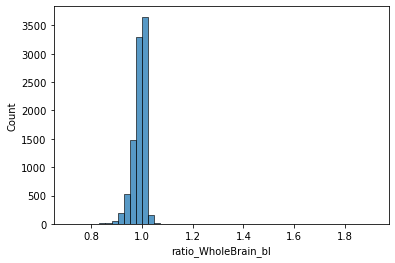

In [290]:
sns.histplot(data=adni_new, x="ratio_WholeBrain_bl",bins=50)

In [308]:
adni_exam_bl = adni_new[adni_new['VISCODE']=='bl']#[com_col + ['EXAMDATE']]
adni_exam_bl = adni_exam_bl.rename({'EXAMDATE': 'EXAMDATE_bl'}, axis=1)[['RID','EXAMDATE_bl']]
# left merge the EXAMDATE_bl to adni_new dataframe
adni_new = pd.merge(adni_new,adni_exam_bl, how = 'left', on='RID' )
adni_new.head(3)
# convert the date into datetime form
from datetime import datetime as dt
adni_new[['EXAMDATE','EXAMDATE_bl']] = adni_new[['EXAMDATE','EXAMDATE_bl']].apply(pd.to_datetime)
#generate new feature: duration in days between the baseline date to the current date
adni_new['duration_in_days'] = (adni_new['EXAMDATE'] - adni_new['EXAMDATE_bl']).astype('timedelta64[D]')
adni_new.head(3)

,RID,PTID,Phase,VISCODE,EXAMDATE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,ABETA,TAU,PTAU,ABETA_bl,TAU_bl,PTAU_bl,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,ratio_ABETA_bl,ratio_TAU_bl,ratio_PTAU_bl,EXAMDATE_bl,duration_in_days
0,2,011_S_0002,ADNI1,bl,2005-09-08,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2005-09-08,0.0
1,3,011_S_0003,ADNI1,bl,2005-09-12,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,741.5,239.7,22.83,741.5,239.7,22.83,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,2005-09-12,0.0
2,3,011_S_0003,ADNI1,m06,2006-03-13,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,741.5,239.7,22.83,1.047057,1.023877,0.973651,1.355109,0.928673,0.992576,NaN,NaN,NaN,2005-09-12,182.0


In [314]:
# add new features: the reduction of brain volume per year
cat_lst = ['ratio_Ventricles_bl','ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl',
       'ratio_PTAU_bl']
new_cat_lst = ['Ventricles_reduction_per_year','Hippocampus_reduction_per_year','wholebrain_reduction_per_year','Entorhinal_reduction_per_year',
               'Fusiform_reduction_per_year','ICV_reduction_per_year','ABETA_reduction_per_year','TAU_reduction_per_year','PTAU_reduction_per_year']
for i in range(len(cat_lst)):
    new_col = new_cat_lst[i]
    old_col = cat_lst[i]
    adni_new[new_col] = (1 - adni_new[old_col])/adni_new['duration_in_days']*365
adni_new

,RID,PTID,Phase,VISCODE,EXAMDATE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,ABETA,TAU,PTAU,ABETA_bl,TAU_bl,PTAU_bl,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,ratio_ABETA_bl,ratio_TAU_bl,ratio_PTAU_bl,EXAMDATE_bl,duration_in_days,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year,ABETA_reduction_per_year,TAU_reduction_per_year,PTAU_reduction_per_year
0,2,011_S_0002,ADNI1,bl,2005-09-08,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2005-09-08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,011_S_0003,ADNI1,bl,2005-09-12,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,741.5,239.7,22.83,741.5,239.7,22.83,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2005-09-12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,011_S_0003,ADNI1,m06,2006-03-13,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,741.5,239.7,22.83,1.047057,1.023877,0.973651,1.355109,0.928673,0.992576,NaN,NaN,NaN,2005-09-12,182.0,-0.094373,-0.047885,0.052843,-0.712169,0.143046,0.014890,NaN,NaN,NaN
3,3,011_S_0003,ADNI1,m12,2006-09-12,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,601.4,251.7,24.18,741.5,239.7,22.83,1.065013,0.969543,0.969739,0.891122,0.942667,0.991217,0.811059,1.050063,1.059133,2005-09-12,365.0,-0.065013,0.030457,0.030261,0.108878,0.057333,0.008783,0.188941,-0.050063,-0.059133
4,3,011_S_0003,ADNI1,m24,2007-09-12,97420.0,5139.0,1088560.0,1175.0,14033.0,16398.0,1903420.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,NaN,NaN,NaN,741.5,239.7,22.83,1.151550,0.966159,0.963472,0.656058,0.905005,0.991008,NaN,NaN,NaN,2005-09-12,730.0,-0.075775,0.016920,0.018264,0.171971,0.047498,0.004496,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16160,6352,033_S_6352,ADNI3,m36,2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47121.4,8734.0,1265200.0,6265.0,26630.0,26068.0,1788950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-07,1104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16161,4288,003_S_4288,ADNI2,m132,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25035.0,7636.0,918889.0,3507.0,15159.0,18984.0,1227040.0,NaN,NaN,NaN,716.6,123.3,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-08,3979.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16162,6512,127_S_6512,ADNI3,m48,2022-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47676.8,8791.7,1134000.0,3718.0,18177.0,23820.0,1605220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-13,1476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16163,6996,003_S_6996,ADNI3,m12,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11602.9,7616.9,911917.0,3335.0,16720.0,19640.0,1244720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-27,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
adni_not_bl = adni_new[adni_new['VISCODE']!= 'bl']

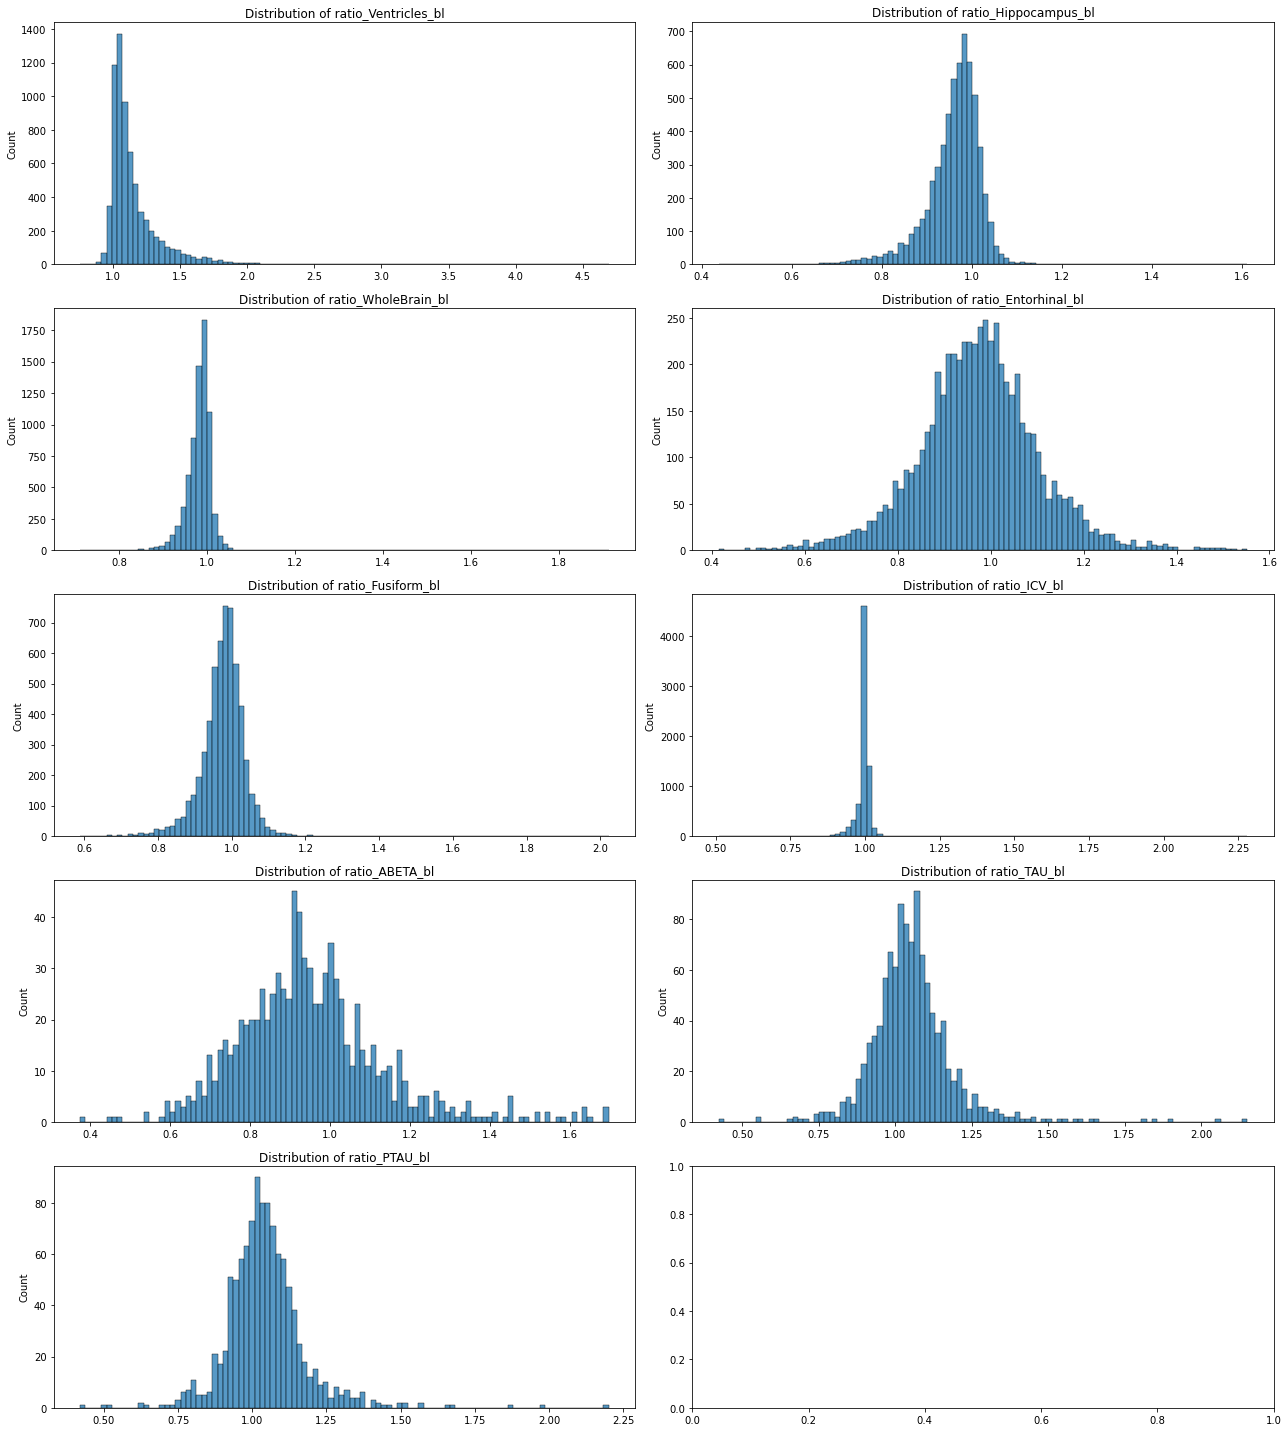

In [316]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,20))
axes = axes.ravel()  # array to 1D
for col, ax in zip(cat_lst, axes):
    sns.histplot(data=adni_not_bl, x=col, ax=ax,bins=100)
    ax.set(title=f'Distribution of {col}', xlabel=None)   
fig.tight_layout()
plt.show()

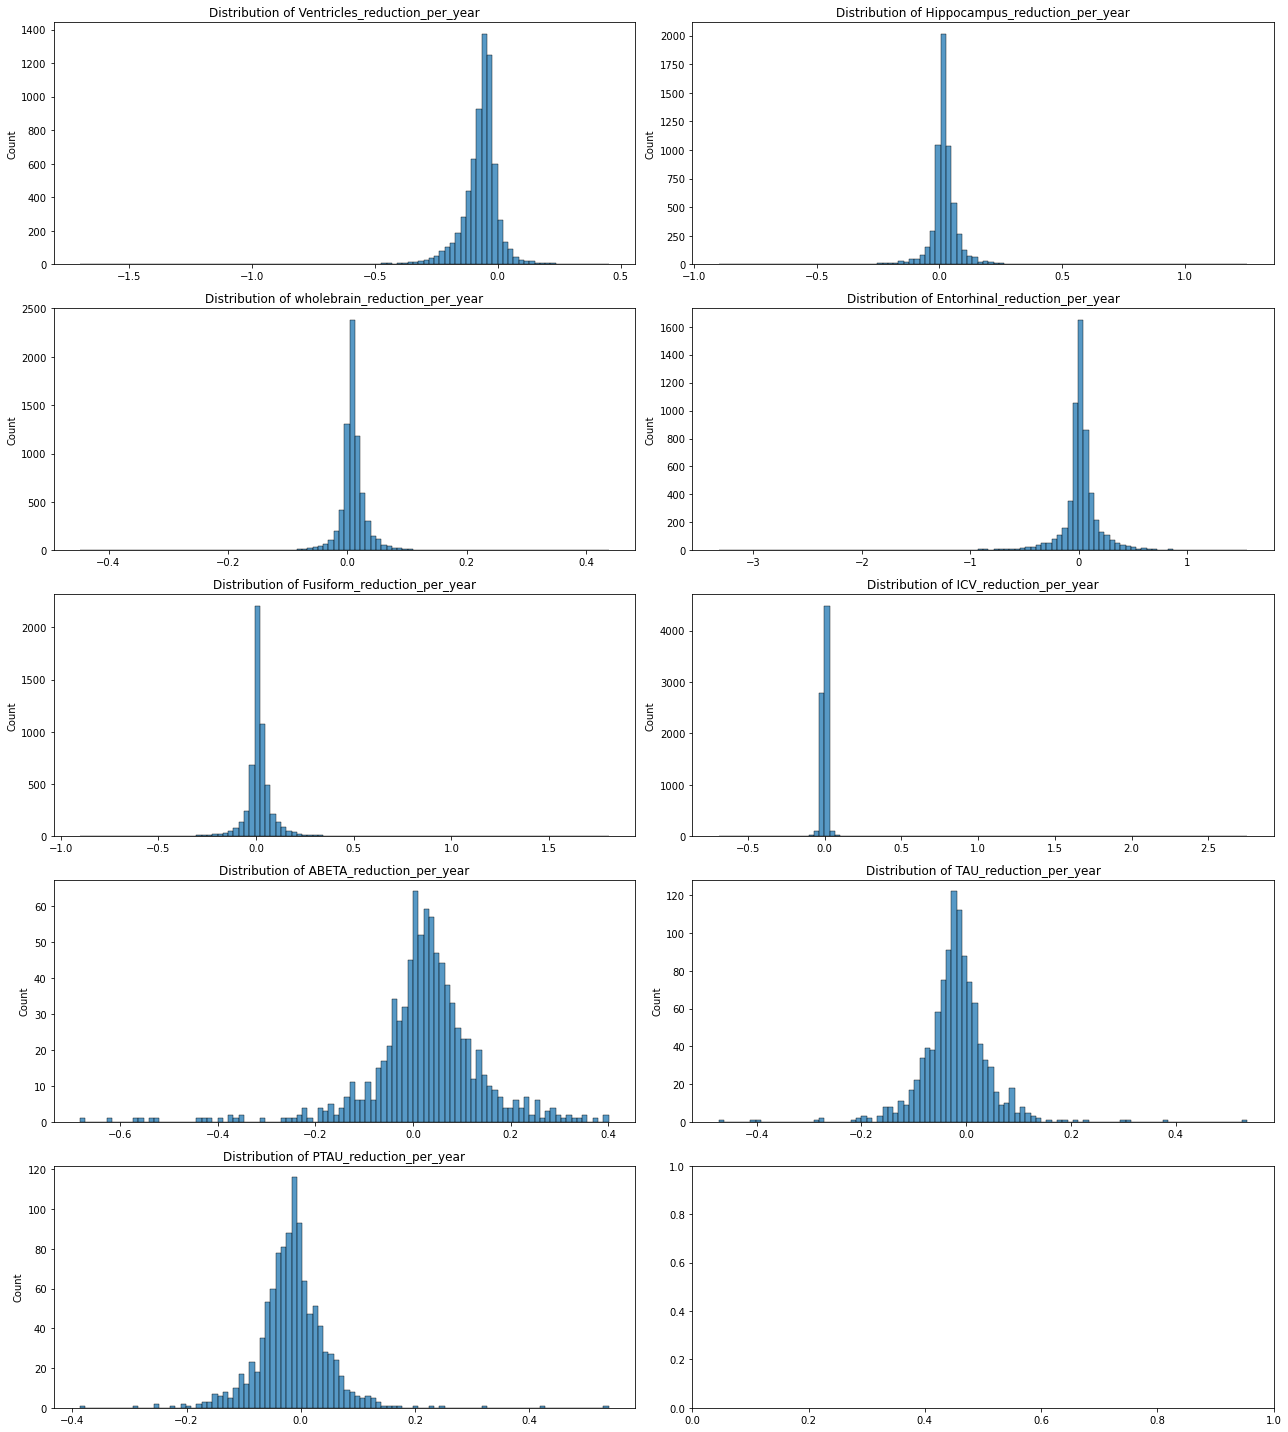

In [317]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,20))
axes = axes.ravel()  # array to 1D
for col, ax in zip(new_cat_lst, axes):
    sns.histplot(data=adni_not_bl, x=col, ax=ax,bins=100)
    ax.set(title=f'Distribution of {col}', xlabel=None)   
fig.tight_layout()
plt.show()

In [318]:
adni_new.to_csv('adnimerge_new.csv')

### dataframe 2:  from ADNIMERGE extract ABETA TAU PTAU DIAGONOSIS

In [64]:
adnimerge_short = adnimerge[['RID', 'PTID','ORIGPROT', 'VISCODE','DX_bl','DX', 'ABETA','TAU','PTAU','ABETA_bl','TAU_bl','PTAU_bl']].drop_duplicates().reset_index(drop=True).sort_values(by= ['RID'])  
adnimerge_short = drop_char(adnimerge_short,'RID').reset_index(drop=True)  #drop the row where RID cant be converted to integer
adnimerge_short = adnimerge_short.drop_duplicates()
adnimerge_short = adnimerge_short.rename(columns = {'ORIGPROT':'Phase'})
adnimerge_short.to_csv('adnimerge_short.csv')
adnimerge_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16165 entries, 0 to 16164
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RID       16165 non-null  int64 
 1   PTID      16165 non-null  object
 2   Phase     16165 non-null  object
 3   VISCODE   16165 non-null  object
 4   DX_bl     16151 non-null  object
 5   DX        11309 non-null  object
 6   ABETA     2370 non-null   object
 7   TAU       2370 non-null   object
 8   PTAU      2369 non-null   object
 9   ABETA_bl  10006 non-null  object
 10  TAU_bl    10006 non-null  object
 11  PTAU_bl   10006 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.6+ MB


In [65]:
adnimerge_short.head(3)

,RID,PTID,Phase,VISCODE,DX_bl,DX,ABETA,TAU,PTAU,ABETA_bl,TAU_bl,PTAU_bl
0,2,011_S_0002,ADNI1,bl,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,011_S_0002,ADNI1,m60,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,011_S_0002,ADNI1,m36,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN


### dataframe 3: demographics data (short version): each RID should have only unique record

In [66]:
demographic_short = adnimerge[['RID','PTGENDER','PTETHCAT','PTRACCAT','AGE']].drop_duplicates().reset_index(drop=True).sort_values(by= ['RID'])
demographic_short = drop_char(demographic_short,'RID').reset_index(drop=True)  #drop the row where RID cant be converted to integer
demographic_short.to_csv('demographic_short.csv')
demographic_short.head(3)

,RID,PTGENDER,PTETHCAT,PTRACCAT,AGE
0,2,Male,Not Hisp/Latino,White,74.3
1,3,Male,Not Hisp/Latino,White,81.3
2,4,Male,Hisp/Latino,White,67.5


In [67]:
demographic_short.info() == demographic_short.groupby(['RID']).count().info()  # True: each RID has only one record in this file.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RID       2421 non-null   int64  
 1   PTGENDER  2421 non-null   object 
 2   PTETHCAT  2421 non-null   object 
 3   PTRACCAT  2421 non-null   object 
 4   AGE       2417 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 94.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421 entries, 2 to 7100
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PTGENDER  2421 non-null   int64
 1   PTETHCAT  2421 non-null   int64
 2   PTRACCAT  2421 non-null   int64
 3   AGE       2421 non-null   int64
dtypes: int64(4)
memory usage: 94.6 KB


True

### DXSUM_PDXCONV_ADNIALL: Diagnostic information

In [68]:
dxsum.head(2)

,Phase,ID,RID,PTID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,DXCHANGE,DXCURREN,DXCONV,DXCONTYP,DXREV,DXNORM,DXNODEP,DXMCI,DXMDES,DXMPTR1,DXMPTR2,DXMPTR3,DXMPTR4,DXMPTR5,DXMPTR6,DXMDUE,DXMOTHET,DXMOTHSP,DXDSEV,DXDDUE,DXAD,DXADES,DXAPP,DXAPROB,DXAMETASP,DXAOTHRSP,DXAPOSS,DXAATYSP,DXAMETSP,DXAOTHSP,DXPARK,DXPARKSP,DXPDES,DXPCOG,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,DIAGNOSIS,update_stamp
0,ADNI1,2.0,2,011_S_0002,107,bl,bl,01.10.2005,NaN,29.09.2005,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,NaN,NaN,-4.0,-4.0,-4.0,-4,-4,-4,-4,-4,-4,-4,-4.0,NaN,-4.0,-4.0,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,01.10.2005 00:00
1,ADNI1,336.0,2,011_S_0002,107,m06,m06,27.04.2006,NaN,06.03.2006,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,-4,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4,NaN,NaN,-4.0,-4.0,-4.0,-4,-4,-4,-4,-4,-4,-4,-4.0,NaN,-4.0,-4.0,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,27.04.2006 00:00


In [69]:
diag_short = dxsum[['Phase', 'RID', 'VISCODE','PTID','DXCHANGE', 'DXCURREN', 'DIAGNOSIS']].drop_duplicates().reset_index(drop=True).sort_values(by= ['RID']) 
diag_short = drop_char(diag_short,'RID').reset_index(drop=True)  #drop the row where RID cant be converted to integer
diag_short.to_csv('diag_adniall_short.csv')
diag_short.head(2)

,Phase,RID,VISCODE,PTID,DXCHANGE,DXCURREN,DIAGNOSIS
0,ADNI1,2,bl,011_S_0002,NaN,1.0,NaN
1,ADNIGO,2,m60,011_S_0002,1.0,NaN,NaN


In [70]:
diag_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13317 entries, 0 to 13316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Phase      13317 non-null  object 
 1   RID        13317 non-null  int64  
 2   VISCODE    13317 non-null  object 
 3   PTID       13317 non-null  object 
 4   DXCHANGE   6146 non-null   float64
 5   DXCURREN   3868 non-null   float64
 6   DIAGNOSIS  3283 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 728.4+ KB


### join dataframes

In [319]:
# by 'RID'
# hypertension, osa, anxiety, depression, demographics
htn_osa = pd.merge(htn_short,osa_short, how = 'outer', on = 'RID') 
htn_osa_anx = pd.merge(htn_osa,anxiety_short, how = 'outer', on = 'RID') 
htn_osa_anx_depr = pd.merge(htn_osa_anx,depression_short, how = 'outer', on = 'RID') 
htn_osa_anx_depr_demo = pd.merge(htn_osa_anx_depr,demographic_short, how = 'outer', on = 'RID') 

htn_osa_anx_depr_demo.to_csv('htn_osa_anx_depr_demograph_by_RID.csv')
htn_osa_anx_depr_demo

,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE
0,1,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN
1,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3
2,3,1.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,81.3
3,4,1.0,0.0,1.0,1.0,Male,Hisp/Latino,White,67.5
4,5,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,73.7
...,...,...,...,...,...,...,...,...,...
3579,7104,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN
3580,7105,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN
3581,7106,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN
3582,4374,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [320]:
# by 'Phase','RID', 'VISCODE'
# ADNIMERGE, DXSUM_PDXCONV_ADNIALL, NPI, INSOMNIA,GDSCALE, NEUROBAT  
adni_diag= pd.merge(adnimerge_short,diag_short, how = 'outer', on = ['Phase','RID','VISCODE','PTID']) 
adni_diag_npi = pd.merge(adni_diag,npi_short, how = 'outer', on = com_col) 
adni_diag_npi_insomnia = pd.merge(adni_diag_npi,insomnia_short, how = 'outer', on = com_col) 
adni_diag_npi_insomnia_GD = pd.merge(adni_diag_npi_insomnia,gdscale_short, how = 'outer', on = com_col) 
adni_diag_npi_insomnia_GD_neurobat = pd.merge(adni_diag_npi_insomnia_GD,neurobat_supershort, how = 'outer', on = com_col)
adni_diag_npi_insomnia_GD_neurobat.to_csv('adni_diag_npi_insomnia_GD_neurobat_by_phase_RID_VISCODE.csv')

In [321]:
main_file = pd.merge(htn_osa_anx_depr_demo,adni_diag_npi_insomnia_GD_neurobat, how = 'outer', on='RID' )
main_file = main_file.replace({-4:np.nan,-1:np.nan,'-4':np.nan,'-1':np.nan})
main_file = main_file.sort_values(by = ['RID'])
# Order  by VISCODE, Phases
main_file['Phase'] = main_file['Phase'].astype('category')
main_file['Phase'] = main_file['Phase'].cat.set_categories(['ADNI1', 'ADNIGO', 'ADNI2', 'ADNI3'], ordered=True)

main_file['VISCODE'] = main_file['VISCODE'].astype('category')
main_file['VISCODE'] = main_file['VISCODE'].cat.set_categories(['sc', 'bl', 'm06', 'm12', 'm18', 'm24', 'm30', 'm36', 'm42', 'm48',
                                                  'm54', 'uns1', 'f', 'nv', 'scmri', 'm03', 'm60', 'm66', 'm72', 'm78', 'v01', 'v02',
                                                  'v03', 'v04', 'v05', 'v06', 'v07', 'v11', 'v12', 'v21', 'v22', 'v31',
                                                  'v32', 'v41', 'v42', 'v51', 'v52', 'tau', 'reg', 'init', 'y1', 'y2', 
                                                  'y3', 'y4', 'y5', 'y6'], ordered=True)
main_file = main_file.sort_values(by = ['RID','Phase','VISCODE'])
main_file

,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE,PTID,Phase,VISCODE,DX_bl,DX,ABETA,TAU,PTAU,ABETA_bl,TAU_bl,PTAU_bl,DXCHANGE,DXCURREN,DIAGNOSIS,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,insomnia,GDSATIS,GDDROP,GDEMPTY,GDBORED,GDSPIRIT,GDAFRAID,GDHAPPY,GDHELP,GDHOME,GDMEMORY,GDALIVE,GDWORTH,GDENERGY,GDHOPE,GDBETTER,GDTOTAL,GDCAT,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5
0,1,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,ADNI1,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN
25,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,NaN,ADNI1,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN
1,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,ADNI1,bl,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,9.0,10.0,11.0
4,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,ADNI1,m06,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,9.0,9.0,9.0,8.0
3,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,ADNI1,m36,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,6.0,6.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27213,7102,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,341_S_7102,ADNI3,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN
27214,7103,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,013_S_7103,ADNI3,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
27215,7104,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,153_S_7104,ADNI3,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN
27216,7105,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,035_S_7105,ADNI3,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


#### complete the 'DXCHANGE'

- ADNI1: DXCURREN 1=NL; 2=MCI; 3=AD
- ADNIGO/2: DXCHANGE
- 1=Stable: NL to NL;
- 2=Stable: MCI to MCI;
- 3=Stable: Dementia to Dementia;
- 4=Conversion: NL to MCI;
- 5=Conversion: MCI to Dementia; 
- 6=Conversion: NL to Dementia;
- 7=Reversion: MCI to NL;
- 8=Reversion: Dementia to MCI;
- 9=Reversion: Dementia to NL
- ADNI3: DIAGNOSIS 1=CN; 2=MCI; 3=Dementia

- Mild Cognitive Impairment (MCI)
- Alzheimer's Disease (AD)
- Significant Memory Concern (SMC)
- Early Mild Cognitive Impairment (EMCI)
- Late Mild Cognitive Impairment (LMCI)

In [322]:
main_file.loc[(main_file['DIAGNOSIS'] == 1.0)|(main_file['DXCURREN']==1.0), 'DX'] = 'CN'
main_file.loc[(main_file['DIAGNOSIS'] == 2.0)|(main_file['DXCURREN']==2.0), 'DX'] = 'MCI'
main_file.loc[(main_file['DIAGNOSIS'] == 3.0)|(main_file['DXCURREN']==3.0), 'DX'] = 'AD'
main_file = main_file.drop(['DIAGNOSIS','DXCURREN'],axis=1)
main_file = main_file[main_file.VISCODE != 'f']   # drop the rows where VISCODE == 'f'
main_file

,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE,PTID,Phase,VISCODE,DX_bl,DX,ABETA,TAU,PTAU,ABETA_bl,TAU_bl,PTAU_bl,DXCHANGE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,insomnia,GDSATIS,GDDROP,GDEMPTY,GDBORED,GDSPIRIT,GDAFRAID,GDHAPPY,GDHELP,GDHOME,GDMEMORY,GDALIVE,GDWORTH,GDENERGY,GDHOPE,GDBETTER,GDTOTAL,GDCAT,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5
25,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,NaN,ADNI1,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN
1,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,ADNI1,bl,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,9.0,10.0,11.0
4,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,ADNI1,m06,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,9.0,9.0,9.0,8.0
3,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,ADNI1,m36,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,6.0,6.0,6.0,8.0,8.0
2,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,ADNI1,m60,CN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27213,7102,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,341_S_7102,ADNI3,sc,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN
27214,7103,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,013_S_7103,ADNI3,sc,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
27215,7104,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,153_S_7104,ADNI3,sc,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN
27216,7105,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,035_S_7105,ADNI3,sc,NaN,MCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [323]:
dx_bl = main_file[main_file['VISCODE']=='bl'][['RID','DX']]   # diagnosis baseline
dx_bl.columns = ['RID','DX_bl']
dx_bl['DX_bl'].unique()

array(['CN', 'AD', 'MCI', nan, 'Dementia'], dtype=object)

In [324]:
main_file = main_file.drop(['DX_bl'],axis=1)   # each RID should have only one diagnosis baseline
main_file = main_file.merge(dx_bl,how='left',on='RID')
main_file['DXCHANGE'].unique()

array([nan,  1.,  4.,  3.,  2.,  7.,  5.,  8.,  6.])

In [325]:
main_file['DX_bl'].unique()

array(['CN', 'AD', 'MCI', nan, 'Dementia'], dtype=object)

In [326]:
main_file['DX'].unique()

array([nan, 'CN', 'MCI', 'AD', 'Dementia'], dtype=object)

In [327]:
main_file.loc[(main_file['DX_bl'] == 'CN')&(main_file['DX']=='CN'), 'DXCHANGE'] = 'CN-CN'
main_file.loc[(main_file['DX_bl'] == 'MCI')&(main_file['DX']=='MCI'), 'DXCHANGE'] = 'MCI-MCI'
main_file.loc[((main_file['DX_bl'] == 'Dementia')|(main_file['DX_bl'] == 'AD'))&((main_file['DX']=='Dementia')|(main_file['DX'] == 'AD')), 'DXCHANGE'] = 'AD-AD'
main_file.loc[(main_file['DX_bl'] == 'CN')&(main_file['DX']=='MCI'), 'DXCHANGE'] = 'CN-MCI'
main_file.loc[(main_file['DX_bl'] == 'MCI')&((main_file['DX']=='Dementia')|(main_file['DX'] == 'AD')), 'DXCHANGE'] = 'MCI-AD'
main_file.loc[(main_file['DX_bl'] == 'CN')&((main_file['DX']=='Dementia')|(main_file['DX'] == 'AD')), 'DXCHANGE'] = 'CN-AD'
main_file.loc[(main_file['DX_bl'] == 'MCI')&(main_file['DX']=='CN'), 'DXCHANGE'] = 'MCI-CN'
main_file.loc[((main_file['DX_bl'] == 'Demencia')|(main_file['DX_bl'] == 'AD'))&(main_file['DX']=='MCI'), 'DXCHANGE'] = 'AD-MCI'
main_file.loc[((main_file['DX_bl'] == 'Demencia')|(main_file['DX_bl'] == 'AD'))&(main_file['DX']=='CN'), 'DXCHANGE'] = 'AD-CN'
main_file = main_file.replace({'DXCHANGE':{1.0:'CN-CN',2.0: 'MCI-MCI',3.0:'AD-AD',4.0:'CN-MCI',5.0:'MCI-AD',6.0:'CN-AD',7.0:'MCI-CN',8.0:'AD-MCI',9.0:'AD-CN'}})
main_file.to_csv('main_file.csv')
main_file['DXCHANGE'].unique()

array([nan, 'CN-CN', 'CN-MCI', 'AD-AD', 'MCI-MCI', 'MCI-AD', 'MCI-CN',
       'CN-AD', 'AD-MCI'], dtype=object)

In [328]:
main_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27165 entries, 0 to 27164
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   RID           27165 non-null  int64   
 1   hypertension  26873 non-null  float64 
 2   OSA           26873 non-null  float64 
 3   anxiety       26873 non-null  float64 
 4   depression    26875 non-null  float64 
 5   PTGENDER      26055 non-null  object  
 6   PTETHCAT      26055 non-null  object  
 7   PTRACCAT      26055 non-null  object  
 8   AGE           26037 non-null  float64 
 9   PTID          24693 non-null  object  
 10  Phase         27165 non-null  category
 11  VISCODE       25437 non-null  category
 12  DX            13926 non-null  object  
 13  ABETA         2370 non-null   object  
 14  TAU           2370 non-null   object  
 15  PTAU          2369 non-null   object  
 16  ABETA_bl      10006 non-null  object  
 17  TAU_bl        10006 non-null  object  
 18  PTAU_b

merge brain volume data and sleep data

In [348]:
df1 = main_file[['RID', 'Phase', 'VISCODE','PTID', 
       'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8',
       'NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT', 'NPIKSEV', 'insomnia','OSA']].set_index(['RID', 'Phase', 'VISCODE','PTID']).dropna(how='all',axis=0).reset_index()   # 'DX', 'DXCHANGE',
df1

,RID,Phase,VISCODE,PTID,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,insomnia,OSA
0,2,ADNI1,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,2,ADNI1,bl,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,2,ADNI1,m06,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,2,ADNI1,m36,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,2,ADNI1,m60,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,7102,ADNI3,sc,341_S_7102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
26870,7103,ADNI3,sc,013_S_7103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
26871,7104,ADNI3,sc,153_S_7104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
26872,7105,ADNI3,sc,035_S_7105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [354]:
df2 = adni_new[['RID', 'Phase', 'VISCODE','PTID','ratio_Ventricles_bl',
       'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl',
       'ratio_PTAU_bl','Ventricles_reduction_per_year', 'Hippocampus_reduction_per_year',
       'wholebrain_reduction_per_year', 'Entorhinal_reduction_per_year',
       'Fusiform_reduction_per_year', 'ICV_reduction_per_year',
       'ABETA_reduction_per_year', 'TAU_reduction_per_year',
       'PTAU_reduction_per_year']].set_index(['RID', 'Phase', 'VISCODE','PTID']).dropna(how='all',axis=0).reset_index()
df2

,RID,Phase,VISCODE,PTID,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,ratio_ABETA_bl,ratio_TAU_bl,ratio_PTAU_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year,ABETA_reduction_per_year,TAU_reduction_per_year,PTAU_reduction_per_year
0,2,ADNI1,bl,011_S_0002,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,ADNI1,bl,011_S_0003,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,ADNI1,m06,011_S_0003,1.047057,1.023877,0.973651,1.355109,0.928673,0.992576,NaN,NaN,NaN,-0.094373,-0.047885,0.052843,-0.712169,0.143046,0.014890,NaN,NaN,NaN
3,3,ADNI1,m12,011_S_0003,1.065013,0.969543,0.969739,0.891122,0.942667,0.991217,0.811059,1.050063,1.059133,-0.065013,0.030457,0.030261,0.108878,0.057333,0.008783,0.188941,-0.050063,-0.059133
4,3,ADNI1,m24,011_S_0003,1.151550,0.966159,0.963472,0.656058,0.905005,0.991008,NaN,NaN,NaN,-0.075775,0.016920,0.018264,0.171971,0.047498,0.004496,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,6563,ADNI3,m12,082_S_6563,1.051142,0.965881,0.982963,1.103586,0.968139,1.005845,NaN,NaN,NaN,-0.042043,0.028048,0.014006,-0.085155,0.026192,-0.004805,NaN,NaN,NaN
9995,7066,ADNI3,bl,033_S_7066,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,5282,ADNI2,m84,082_S_5282,NaN,0.964769,NaN,NaN,NaN,0.972470,NaN,NaN,NaN,NaN,0.004950,NaN,NaN,NaN,0.003868,NaN,NaN,NaN
9997,6688,ADNI3,m24,130_S_6688,1.015564,0.992842,0.993657,1.027476,0.972899,0.996670,NaN,NaN,NaN,-0.007803,0.003589,0.003180,-0.013776,0.013588,0.001670,NaN,NaN,NaN


In [359]:
sleep_brain_v = pd.merge(df1,df2, how = 'inner', on = ['RID', 'Phase', 'VISCODE','PTID']) 
sleep_brain_v = sleep_brain_v[sleep_brain_v['VISCODE']!='bl']
sleep_brain_v.to_csv('sleep_brain_v.csv')
sleep_brain_v

,RID,Phase,VISCODE,PTID,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,insomnia,OSA,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,ratio_ABETA_bl,ratio_TAU_bl,ratio_PTAU_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year,ABETA_reduction_per_year,TAU_reduction_per_year,PTAU_reduction_per_year
2,3,ADNI1,m06,011_S_0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.047057,1.023877,0.973651,1.355109,0.928673,0.992576,NaN,NaN,NaN,-0.094373,-0.047885,0.052843,-0.712169,0.143046,0.014890,NaN,NaN,NaN
3,3,ADNI1,m12,011_S_0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.065013,0.969543,0.969739,0.891122,0.942667,0.991217,0.811059,1.050063,1.059133,-0.065013,0.030457,0.030261,0.108878,0.057333,0.008783,0.188941,-0.050063,-0.059133
4,3,ADNI1,m24,011_S_0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.151550,0.966159,0.963472,0.656058,0.905005,0.991008,NaN,NaN,NaN,-0.075775,0.016920,0.018264,0.171971,0.047498,0.004496,NaN,NaN,NaN
6,4,ADNI1,m06,022_S_0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.003055,0.937400,0.966493,0.931710,0.940271,0.989098,NaN,NaN,NaN,-0.006372,0.130566,0.069886,0.142434,0.124577,0.022739,NaN,NaN,NaN
7,4,ADNI1,m12,022_S_0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.972781,0.939147,0.967454,0.883505,0.981876,0.986484,0.783478,1.043109,1.000752,0.026779,0.059869,0.032020,0.114611,0.017830,0.013298,0.213021,-0.042412,-0.000740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9377,6863,ADNI3,m12,022_S_6863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.110050,0.948087,0.973152,0.798472,0.913410,1.001717,NaN,NaN,NaN,-0.095867,0.045223,0.023388,0.175555,0.075430,-0.001496,NaN,NaN,NaN
9385,6877,ADNI3,m12,305_S_6877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.005673,0.971493,0.999353,1.215293,1.000469,1.005690,NaN,NaN,NaN,-0.005673,0.028507,0.000647,-0.215293,-0.000469,-0.005690,NaN,NaN,NaN
9387,6878,ADNI3,m12,036_S_6878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.088738,0.995199,0.997817,1.042324,0.986492,1.009624,NaN,NaN,NaN,-0.082416,0.004459,0.002028,-0.039308,0.012546,-0.008938,NaN,NaN,NaN
9389,6896,ADNI3,m12,021_S_6896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.988225,1.012156,1.010820,0.974245,1.048005,1.031943,NaN,NaN,NaN,0.012106,-0.012499,-0.011124,0.026480,-0.049357,-0.032842,NaN,NaN,NaN
